# Sentiment Analysis Project
This notebook focuses on sentiment analysis in the hospitality domain. The goal is to preprocess text data, extract features, and build models to classify sentiments.

## Importing Libraries
We start by importing the necessary libraries for data manipulation, text preprocessing, and machine learning. Each library serves a specific purpose, such as handling data (pandas), numerical operations (numpy), and text processing (nltk).

In [11]:
# Importing necessary libraries
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import random  # for shuffling the data
import nltk
import re  # for handling regular expressions

from nltk.stem import WordNetLemmatizer  # for lemmatizing words
from nltk.corpus import stopwords  # for stop word removal
from nltk.tokenize import word_tokenize  # for tokenizing sentences into words

# Downloading necessary NLTK resources
nltk.download('stopwords')  # List of common stop words in English
nltk.download('punkt')  # Pre-trained tokenizer models
nltk.download('wordnet')  # WordNet lemmatizer dataset
nltk.download('punkt_tab')  # Downloads the 'punkt' tokenizer table used for tokenization of text into sentences or words

# Libraries for text feature extraction and model training
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numerical features (TF-IDF)
from sklearn.linear_model import LogisticRegression  # Logistic regression for classification
from sklearn.svm import LinearSVC  # Support Vector Machines for classification

# Libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation metrics
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zeal.v/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zeal.v/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zeal.v/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Additional Libraries
Here, we import libraries for visualization (matplotlib, seaborn) and environment variable management (dotenv). These libraries help in creating plots and securely managing file paths.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

## Loading Data
We use the `dotenv` library to load environment variables and securely access the file path for the dataset. The dataset is then loaded into a pandas DataFrame for analysis.

In [13]:
# Load environment variables
load_dotenv()

# Get the file path from the .env file
file_path = os.getenv('FILE_PATH')

# Load the .tsv file
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


## Data Overview
The `info()` method provides a summary of the dataset, including column names, data types, and non-null counts. This helps in understanding the structure of the data.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Text Preprocessing
Text preprocessing is a crucial step in NLP. It involves cleaning and transforming text data into a format suitable for analysis. The steps include converting text to lowercase, tokenization, removing stopwords, and punctuation.

In [15]:
# Define a preprocessing function
def preprocess_text(doc):
    # Convert to lowercase
    doc = doc.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(doc)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

## Applying Preprocessing
The preprocessing function is applied to the 'Review' column to create a new column 'text_processed'. This column contains the cleaned and tokenized text data.

In [16]:
import string # Import the string module for handling punctuation

# Apply the preprocessing function to the 'Review' column
df['text_processed'] = df['Review'].apply(preprocess_text)

# Display the first few rows of the updated DataFrame
print(df[['Review', 'text_processed']].head())

                                              Review  \
0                           Wow... Loved this place.   
1                                 Crust is not good.   
2          Not tasty and the texture was just nasty.   
3  Stopped by during the late May bank holiday of...   
4  The selection on the menu was great and so wer...   

                                      text_processed  
0                                  wow  loved place   
1                                        crust good   
2                               tasty texture nasty   
3  stopped late may bank holiday rick steve recom...  
4                       selection menu great prices   


In [17]:
df['Review'].head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [18]:
df['text_processed'].head()

0                                    wow  loved place 
1                                          crust good 
2                                 tasty texture nasty 
3    stopped late may bank holiday rick steve recom...
4                         selection menu great prices 
Name: text_processed, dtype: object

## Project Overview
This project aims to analyze customer reviews in the restaurant industry to understand sentiment and improve service quality. By leveraging machine learning, we will classify reviews as positive or negative and extract actionable insights.

## Dataset Details
The dataset contains two columns:
- **Review**: The text of the customer review.
- **Liked**: A binary label indicating sentiment (1 for positive, 0 for negative).

## Exploratory Data Analysis (EDA)
We will explore the dataset to identify patterns and insights, such as:
- Review length and its correlation with sentiment.
- Frequent keywords in positive and negative reviews.
- Mixed sentiments in reviews.

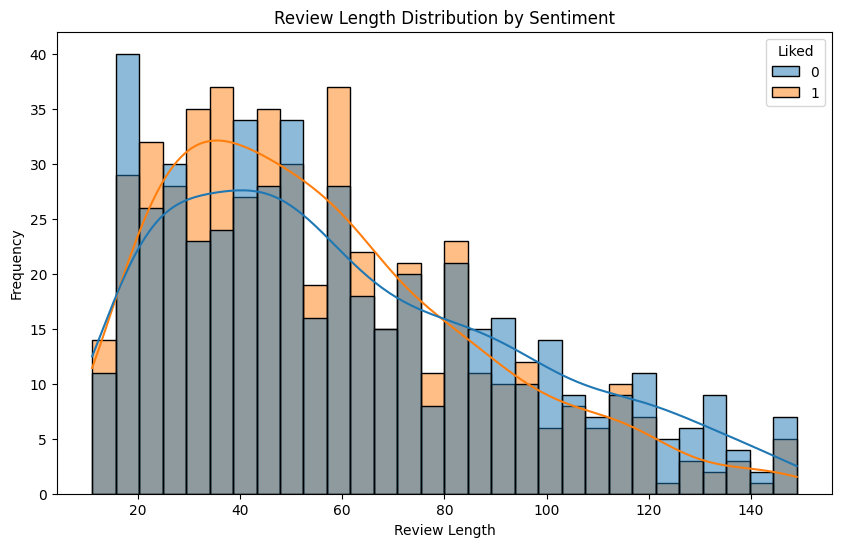

In [19]:
# Analyze review lengths
df['review_length'] = df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='Liked', bins=30, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Extract frequent keywords
from collections import Counter
positive_reviews = df[df['Liked'] == 1]['text_processed']
negative_reviews = df[df['Liked'] == 0]['text_processed']

positive_words = Counter(' '.join(positive_reviews).split())
negative_words = Counter(' '.join(negative_reviews).split())

print('Most common words in positive reviews:', positive_words.most_common(10))
print('Most common words in negative reviews:', negative_words.most_common(10))

Most common words in positive reviews: [('good', 73), ('great', 70), ('food', 60), ('place', 57), ('service', 46), ('friendly', 24), ('delicious', 23), ('back', 23), ('amazing', 22), ('nice', 22)]
Most common words in negative reviews: [('nt', 78), ('food', 65), ('place', 49), ('back', 38), ('service', 37), ('like', 29), ('go', 26), ('would', 25), ('good', 22), ('never', 22)]


## Feature Engineering
In this section, we will use TF-IDF to convert text data into numerical features. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents.

In [21]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

# Fit and transform the 'text_processed' column
X_tfidf = tfidf_vectorizer.fit_transform(df['text_processed'])

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

    10   12   20   30   35   40  absolutely  acknowledged  actually  added  \
0  0.0  0.0  0.0  0.0  0.0  0.0         0.0           0.0       0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0         0.0           0.0       0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0         0.0           0.0       0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0         0.0           0.0       0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0         0.0           0.0       0.0    0.0   

   ...  wonderful  world  worse  worst  worth       wow  wrong  years  yummy  \
0  ...        0.0    0.0    0.0    0.0    0.0  0.713495    0.0    0.0    0.0   
1  ...        0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
2  ...        0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
3  ...        0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
4  ...        0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   

   zero  
0   0.0  
1   0.0  
2   0.0  
3   0.0  


## Train-Test Split
To evaluate the performance of our models, we split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
y = df['Liked']
X = X_tfidf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

## Model Training
We will train two models: Logistic Regression and Support Vector Machine (SVM). These models are commonly used for text classification tasks.

In [ ]:
# Train Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Train Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

## Model Evaluation
We evaluate the models using the testing set. Metrics such as accuracy, precision, recall, and F1-score will be calculated to assess the performance of each model.

In [ ]:
# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
print('Logistic Regression Performance:')
print(classification_report(y_test, y_pred_logistic))

# Evaluate Support Vector Machine
y_pred_svm = svm_model.predict(X_test)
print('SVM Performance:')
print(classification_report(y_test, y_pred_svm))

## Next Steps
1. Preprocess the text data further if needed.
2. Engineer features using TF-IDF or word embeddings.
3. Train and evaluate machine learning models.
4. Interpret results and provide actionable insights for the restaurant.